In [1]:
#importing the necessary independence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn import preprocessing

In [2]:
car = pd.read_csv('/content/drive/MyDrive/car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [4]:
car.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [5]:
car.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [6]:
car.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [7]:
car.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [8]:
data=[]
def car_sale(new):
  new.replace({'Car_Transmission':{'Manual': 1, 'Automatic': 0}},inplace=True)
  new.replace({'Fuel_Type':{'Petrol': 1, 'Diesel': 0, 'CNG': 2}},inplace=True)
  new.replace({'Selling_type':{'Dealer': 1,'Individual': 0}},inplace=True)
  return new
data=car_sale(car)


In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,0,1,1,0


In [10]:
lb= preprocessing.LabelEncoder()
data['Car_Name']= lb.fit_transform(data['Car_Name'])
data['Car_Name'].unique

<bound method Series.unique of 0      90
1      93
2      68
3      96
4      92
       ..
296    69
297    66
298    69
299    69
300    66
Name: Car_Name, Length: 301, dtype: int64>

In [11]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,1,1,1,0
1,93,2013,4.75,9.54,43000,0,1,1,0
2,68,2017,7.25,9.85,6900,1,1,1,0
3,96,2011,2.85,4.15,5200,1,1,1,0
4,92,2014,4.60,6.87,42450,0,1,1,0


In [12]:
data.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [13]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [14]:
data.describe()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,2013.627907,4.661296,7.628472,36947.205980,0.807309,0.647841,0.867110,0.043189
std,25.573535,2.891554,5.082812,8.642584,38886.883882,0.411598,0.478439,0.340021,0.247915
min,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,2012.000000,0.900000,1.200000,15000.000000,1.000000,0.000000,1.000000,0.000000
50%,69.000000,2014.000000,3.600000,6.400000,32000.000000,1.000000,1.000000,1.000000,0.000000
75%,82.000000,2016.000000,6.000000,9.900000,48767.000000,1.000000,1.000000,1.000000,0.000000
max,97.000000,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [15]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,1,1,1,0
1,93,2013,4.75,9.54,43000,0,1,1,0
2,68,2017,7.25,9.85,6900,1,1,1,0
3,96,2011,2.85,4.15,5200,1,1,1,0
4,92,2014,4.60,6.87,42450,0,1,1,0


In [16]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

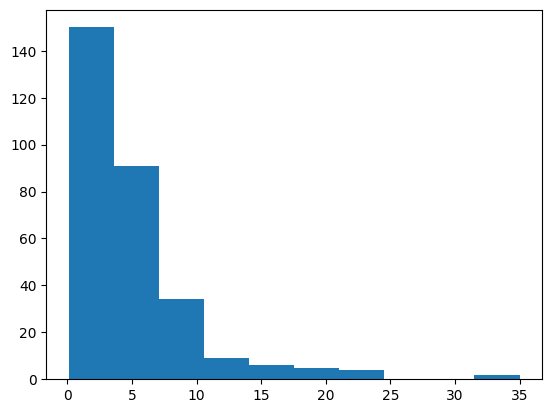

In [17]:
plt.hist(data['Selling_Price'])
plt.show()

In [18]:
x = data[['Car_Name', 'Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission']]
y=data['Selling_Price']

In [19]:
print(y.unique())

[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25  5.11  2.7
  6.15 11.45  3.9   9.1   4.8   2.    5.35  6.25  5.95  5.2   3.75 12.9
  5.    5.4   7.2  10.25  8.5   8.4   9.15  6.6   3.65  8.35  6.7   5.3
 10.9   8.65  9.7   2.1   8.99  7.4   5.65 10.11  6.4   8.55  9.5  11.5 ]


In [20]:
from types import MethodWrapperType
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
model = LinearRegression()
model.fit(x_train,y_train)
predicted= model.predict(x_test)
print("MSE:",metrics.mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

MSE: 1.9883709821706979
R squared: 0.9222880298261111


In [21]:
pip install pypickle

In [24]:
import pypickle

# save the model
filename = 'model.pkl'
status = pypickle.save(filename, model)
#pickle.dump(model, open(filename, 'wb'))

[pypickle] Pickle file saved: [model.pkl]


In [23]:
import pickle
pickle.dump(model, open('model.sav', 'wb'))